## 1. Importing Libraries and Data

In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import missingno as msno

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate


warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter('ignore',category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)



dff=pd.read_csv(r"C:\Users\Workstation\PycharmProjects\VBO1\Final_Project\train.csv")

#### EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
   
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


In [5]:
dff.dropna(inplace=True,axis=1)

cat_cols, num_cols, cat_but_car  = grab_col_names(dff)


Observations: 1460
Variables: 62
cat_cols: 37
num_cols: 24
cat_but_car: 1
num_but_cat: 11


'\nObservations: 1460\nVariables: 62\ncat_cols: 37\nnum_cols: 24\ncat_but_car: 1\nnum_but_cat: 11\n'

In [6]:
dff.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

#### Encoding

In [8]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [9]:
binary_cols = [col for col in dff.columns if dff[col].dtypes == "O" and len(dff[col].unique()) == 2]

for col in binary_cols:
    label_encoder(dff, col)


In [10]:
dff=pd.get_dummies(dff, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                              'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                              'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
                              'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition', 'OverallCond',
                              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                              'Fireplaces', 'GarageCars', 'PoolArea','YrSold','Neighborhood'], drop_first=True)


In [11]:
dff.shape
#(1460, 225)

(1460, 225)

In [12]:
dff.dtypes

Id                       int64
MSSubClass               int64
LotArea                  int64
OverallQual              int64
YearBuilt                int64
YearRemodAdd             int64
BsmtFinSF1               int64
BsmtFinSF2               int64
BsmtUnfSF                int64
TotalBsmtSF              int64
1stFlrSF                 int64
2ndFlrSF                 int64
LowQualFinSF             int64
GrLivArea                int64
TotRmsAbvGrd             int64
GarageArea               int64
WoodDeckSF               int64
OpenPorchSF              int64
EnclosedPorch            int64
3SsnPorch                int64
ScreenPorch              int64
MiscVal                  int64
MoSold                   int64
SalePrice                int64
MSZoning_FV              uint8
MSZoning_RH              uint8
MSZoning_RL              uint8
MSZoning_RM              uint8
Street_1                 uint8
LotShape_IR2             uint8
LotShape_IR3             uint8
LotShape_Reg             uint8
LandCont

In [13]:
y = dff['SalePrice']
X = dff.drop(["Id", "SalePrice"], axis=1)

#### Scaling

In [14]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## MODEL& PREDICTION

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

regressors = [("GBM", GradientBoostingRegressor()),
              ("RF", RandomForestRegressor()),
              ('XGBoost', XGBRegressor(objective='reg:squarederror')),
              ('LightGBM', LGBMRegressor())]

for name, regressor in regressors:

    reg_model = regressor.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    cv_rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = reg_model.score(X_test, y_test)
    print(f"Test RMSE: {round(test_rmse, 4)} ({name}) ")
    print(f"Test R2: {round(test_r2, 4)} ({name}) ")
    print(f"10-Fold CV RMSE: {round(cv_rmse, 4)} ({name}) ")
    print('****************************************************')



Test RMSE: 28220.4147 (GBM) 
Test R2: 0.8741 (GBM) 
10-Fold CV RMSE: 26183.8453 (GBM) 
****************************************************
Test RMSE: 29628.336 (RF) 
Test R2: 0.8612 (RF) 
10-Fold CV RMSE: 28924.5171 (RF) 
****************************************************
Test RMSE: 30161.6044 (XGBoost) 
Test R2: 0.8562 (XGBoost) 
10-Fold CV RMSE: 28566.7433 (XGBoost) 
****************************************************
Test RMSE: 29429.7051 (LightGBM) 
Test R2: 0.8631 (LightGBM) 
10-Fold CV RMSE: 28454.7662 (LightGBM) 
****************************************************


'\nBase Model Sonuclari\n\nTest RMSE: 28093.2963 (GBM) \nTest R2: 0.8752 (GBM) \n10 Katlı CV RMSE: 26254.3357 (GBM) \n****************************************************\nTest RMSE: 29972.619 (RF) \nTest R2: 0.858 (RF) \n10 Katlı CV RMSE: 29117.2353 (RF) \n****************************************************\nTest RMSE: 30161.6044 (XGBoost) \nTest R2: 0.8562 (XGBoost) \n10 Katlı CV RMSE: 28566.7433 (XGBoost) \n****************************************************\nTest RMSE: 29429.7051 (LightGBM) \nTest R2: 0.8631 (LightGBM) \n10 Katlı CV RMSE: 28454.7662 (LightGBM) \n****************************************************\n\n'

     Value       Feature
2    0.469   OverallQual
12   0.146     GrLivArea
8    0.065   TotalBsmtSF
186  0.057  GarageCars_3
5    0.047    BsmtFinSF1
10   0.045      2ndFlrSF
9    0.031      1stFlrSF
4    0.025  YearRemodAdd
1    0.020       LotArea
3    0.018     YearBuilt
14   0.010    GarageArea
182  0.008  Fireplaces_2
16   0.007   OpenPorchSF
166  0.007    FullBath_1
185  0.006  GarageCars_2


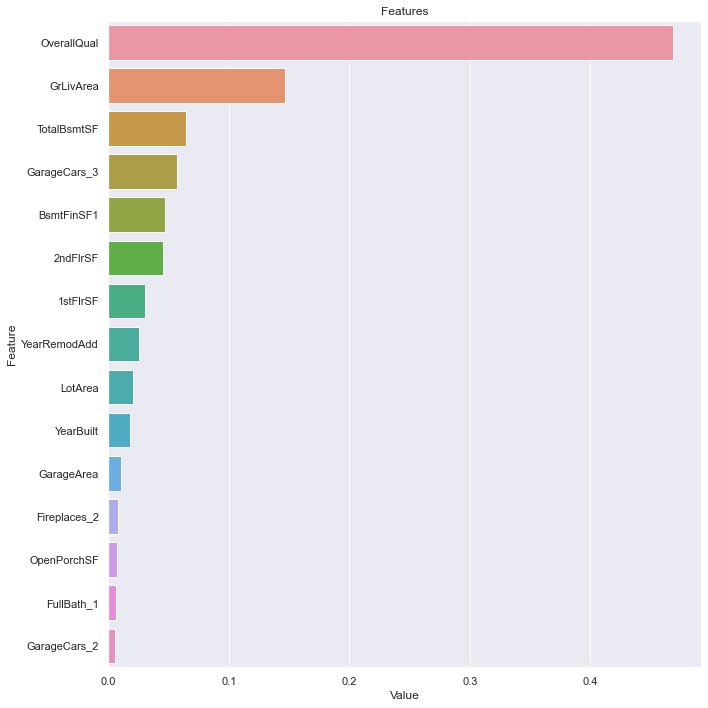

'\nBase Model icin\n\n     Value       Feature\n2    0.468   OverallQual\n12   0.148     GrLivArea\n8    0.067   TotalBsmtSF\n186  0.057  GarageCars_3\n5    0.048    BsmtFinSF1\n10   0.045      2ndFlrSF\n9    0.027      1stFlrSF\n4    0.025  YearRemodAdd\n1    0.020       LotArea\n3    0.018     YearBuilt\n14   0.011    GarageArea\n182  0.008  Fireplaces_2\n166  0.007    FullBath_1\n16   0.007   OpenPorchSF\n185  0.006  GarageCars_2'

In [17]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values(by='Value',ascending=False).head(15))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

reg_model = GradientBoostingRegressor().fit(X_train, y_train)
plot_importance(reg_model, X_train, num=15)
